In [7]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as ss
from tqdm import tqdm

No Noise

In [8]:
H_min = 0.0
H_max = 1.0

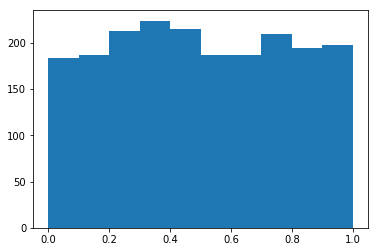

In [9]:
N = 2000

H_list = np.random.random(N)

plt.figure()
plt.hist(H_list,bins = 10)
plt.show()

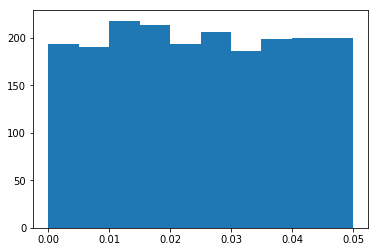

In [10]:
N_p = 100
E = 2
noise_pct_list = np.random.random(N)*0.05

plt.figure()
plt.hist(noise_pct_list,bins = 10)
plt.show()

In [11]:
for i in tqdm(range(N)):
    field = ss.fBm(E=E,exp=False,H=H_list[i],N=N_p*4)
    noise = ss.fBm(E=E,exp=False, H = -1, N=N_p)
    field = field[150:250,150:250]
    
    m_1_field = np.mean(field)
    s_1_field = np.std(field)
    m_2_field = 0
    s_2_field = 1/4
            
    m_1_noise = np.mean(noise)
    s_1_noise = np.std(noise)
    m_2_noise = 0
    s_2_noise = s_2_field*noise_pct_list[i]
    
    field *= s_2_field/s_1_field
    field += (m_2_field-m_1_field*s_2_field/s_1_field)
    
    noise *= s_2_noise/s_1_noise
    noise += (m_2_noise-m_1_noise*s_2_noise/s_1_noise)
    
    #field += noise
    
    #field[np.where(field>1.)] = 1.
    #field[np.where(field<-1.)] = -1.
    
    np.savetxt('D:/UnexponentiatedNonPeriodic/features/field_'+format(i,'06d')+'.txt',field)

  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:22<00:00,  7.63it/s]


In [12]:
np.savetxt('D:/UnexponentiatedNonPeriodic/labels/labels.txt', H_list)